In [26]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
properties = dd.read_csv(
    '/home/data/infutor/Property/bay_area_properties*',
#     dtype=str
    usecols=list(range(15,25)) + [30, 211]
)

In [44]:
properties.head()

,HOUSE,PREDIR,STREET,STRTYPE,POSTDIR,APTTYPE,APTNBR,CITY,STATE,ZIP,ADDRID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOVATO,CA,NaN,248051559
1,1613,N,ASCOT,PKWY,NaN,NaN,NaN,VALLEJO,CA,NaN,660643601
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAIRFIELD,CA,NaN,248051559
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAIRFIELD,CA,NaN,248051559
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAIRFIELD,CA,NaN,248051559


In [50]:
properties[properties['ADDRID'].isin([273700577.0, 115743138])].compute()

/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/dask/core.py:118: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]
/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/dask/core.py:118: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


,HOUSE,PREDIR,STREET,STRTYPE,POSTDIR,APTTYPE,APTNBR,CITY,STATE,ZIP,DPV,ADDRID
12409,550,NaN,DAVIS,ST,NaN,UNIT,40,SAN FRANCISCO,CA,94111.0,Y,273700577
21272,550,NaN,DAVIS,ST,NaN,UNIT,45,SAN FRANCISCO,CA,94111.0,Y,115743138


In [2]:
movers = pd.read_csv('../data/movers.csv', index_col=0)

In [23]:
movers[movers.index.values == 'Y39394691080411']

,from_addrid,from_lat,from_lon,PROP_IND_from,PROP_OWNEROCC_from,PROP_QLTY_from,PROP_VALCALC_from,PROP_UNVBLDSQFT_from,PROP_BEDRMS_from,to_addrid,...,to_effdate,distance,AGE,LOR,HOMEOWNERCD,EHI,PCTB,PCTW,PCTH,PCTA
Y39394691080411,41997203.0,37.750162,-122.42142,11.0,O,NaN,687564.0,1465.0,2.0,49139849,...,200811.0,0.221968,52.0,6.0,H,D,T,H,P,R
Y39394691080411,49139849.0,37.750164,-122.42142,11.0,A,NaN,687564.0,1402.0,2.0,41997203,...,200212.0,0.221968,52.0,6.0,H,D,T,H,P,R
Y39394691080411,49139849.0,37.750164,-122.42142,11.0,A,NaN,687564.0,1402.0,2.0,180797851,...,200910.0,1898.928619,52.0,6.0,H,D,T,H,P,R
Y39394691080411,180797851.0,37.759005,-122.40297,11.0,O,NaN,1762861.0,2323.0,2.0,34435742,...,201707.0,1576.111655,52.0,6.0,H,D,T,H,P,R


In [13]:
movers_w_dist = movers[movers['distance'] > 0]

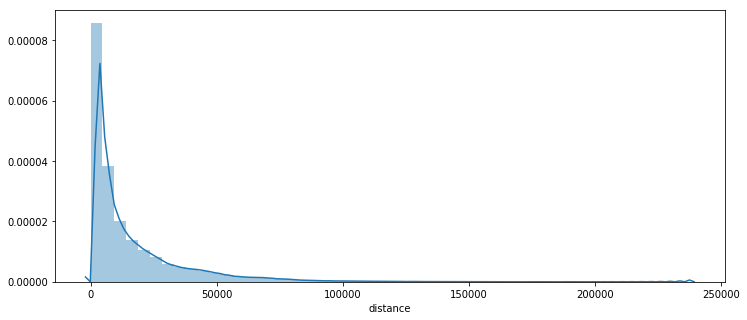

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
data = movers_w_dist['distance']
sns.distplot(data, ax=ax)

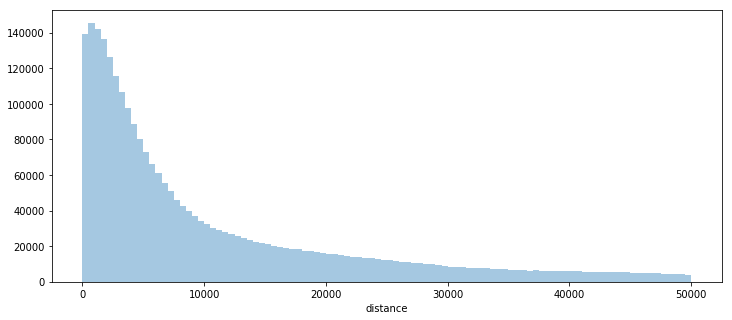

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
data = movers_w_dist.loc[movers_w_dist['distance'] < 50000, 'distance']
sns.distplot(data, kde=False, ax=ax, bins=100)

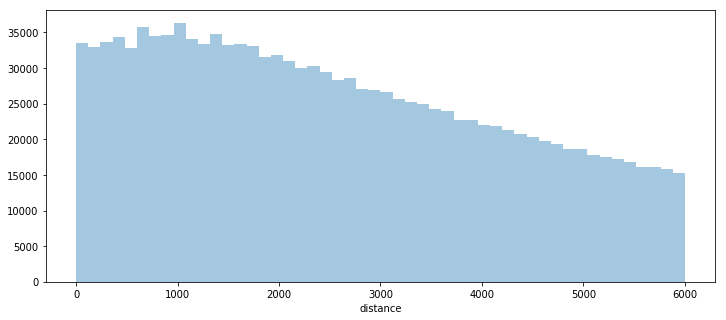

In [72]:
fig, ax = plt.subplots(figsize=(12,5))
data = movers_w_dist.loc[(movers_w_dist['distance'] < 6000), 'distance']
sns.distplot(data, kde=False, ax=ax)

In [73]:
movers_rent = movers_w_dist[movers_w_dist['HOMEOWNERCD'] == 'R']
movers_own = movers_w_dist[movers_w_dist['HOMEOWNERCD'] == 'H']

/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


(-5000, 100000)

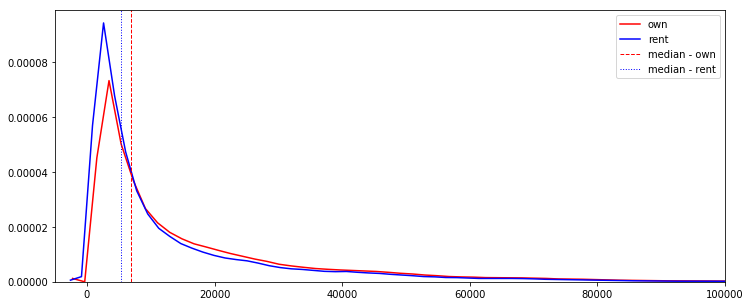

In [100]:
fig, ax = plt.subplots(figsize=(12,5))
sns.kdeplot(movers_own['distance'], ax=ax, label='own', c='r')
sns.kdeplot(movers_rent['distance'], ax=ax, label='rent', c='b')
ax.axvline(movers_own['distance'].median(), 0, 1, linewidth=1, c='r', linestyle='--', label='median - own')
ax.axvline(movers_rent['distance'].median(), 0, 1, linewidth=1, c='b', linestyle=':', label='median - rent')
ax.legend()
ax.set_xlim(-5000, 100000)

/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/max/anaconda3/envs/infutor/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


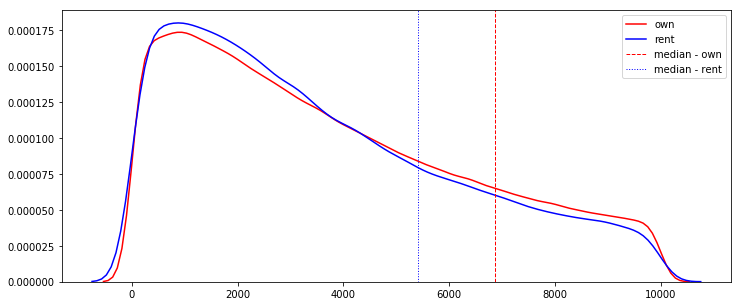

In [105]:
fig, ax = plt.subplots(figsize=(12,5))
sns.kdeplot(movers_own['distance'][movers_own['distance'] < 10000], ax=ax, label='own', c='r')
sns.kdeplot(movers_rent['distance'][movers_rent['distance'] < 10000], ax=ax, label='rent', c='b')
ax.axvline(movers_own['distance'].median(), 0, 1, linewidth=1, c='r', linestyle='--', label='median - own')
ax.axvline(movers_rent['distance'].median(), 0, 1, linewidth=1, c='b', linestyle=':', label='median - rent')
ax.legend()
# ax.set_xlim(-5000, 10000)